# Bab 18: Reinforcement Learning

Bab ini bertujuan untuk memperdalam pemahaman tentang Reinforcement Learning (RL), sebuah paradigma pembelajaran mesin di mana agen belajar membuat keputusan berdasarkan interaksi dengan lingkungannya untuk memaksimalkan *reward*. Kita akan mereproduksi konsep inti melalui kode Python dan penjelasan teoritis terstruktur, menggunakan buku "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow" sebagai referensi utama.

---

### **1. Pendahuluan**

Reinforcement Learning (RL) adalah salah satu bidang Machine Learning yang paling menarik dan juga salah satu yang tertua. Ini adalah paradigma pembelajaran di mana agen perangkat lunak membuat observasi dan mengambil tindakan dalam suatu lingkungan, dan sebagai balasannya menerima *reward* (hadiah). Tujuan agen adalah belajar bertindak sedemikian rupa untuk memaksimalkan *reward* yang diharapkan dari waktu ke waktu. Ini berbeda dari *supervised learning* karena agen tidak secara eksplisit diberikan jawaban yang 'benar', dan berbeda dari *unsupervised learning* karena ada bentuk pengawasan melalui *reward*.

Beberapa contoh aplikasi RL yang relevan termasuk:
* **Robotika**: Agen mengontrol robot untuk navigasi atau tugas tertentu.
* **Bermain Game**: Agen belajar bermain game Atari dari awal, bahkan mengungguli manusia.
* **Sistem Rekomendasi**: Agen merekomendasikan produk atau konten kepada pengguna.
* **Smart Thermostat**: Agen mengontrol suhu untuk menghemat energi dan mengantisipasi kebutuhan manusia.

Bab ini akan membahas teknik-teknik penting dalam Deep Reinforcement Learning, seperti *policy gradients* dan *deep Q-networks* (DQNs). Kita akan menggunakan **OpenAI Gym** untuk lingkungan simulasi dan **TF-Agents** untuk implementasi.

---

### **2. Belajar Mengoptimalkan *Rewards***

Dalam Reinforcement Learning, interaksi agen dengan lingkungan dapat digambarkan sebagai siklus. Agen membuat **observasi** dari lingkungan, mengambil **aksi** berdasarkan *policy*-nya, dan sebagai balasannya menerima **reward** dari lingkungan. Tujuan utama agen adalah untuk belajar **policy** yang akan memaksimalkan total *reward* yang diharapkan dari waktu ke waktu.

**Elemen-elemen Kunci RL:**
* **Agen (Agent)**: Entitas perangkat lunak yang belajar dan mengambil tindakan.
* **Lingkungan (Environment)**: Dunia tempat agen berinteraksi; ini bisa berupa simulasi atau dunia nyata.
* **Aksi (Actions)**: Tindakan yang dapat diambil agen dalam lingkungan.
* **Observasi (Observations)**: Informasi yang diterima agen dari lingkungan setelah mengambil aksi.
* **Reward (Hadiah)**: Umpan balik numerik (positif atau negatif) yang diterima agen dari lingkungan setelah mengambil aksi.

**Siklus Interaksi Agen-Lingkungan:**
1.  Agen mengamati lingkungan (`Observation`).
2.  Berdasarkan observasi dan *policy* saat ini, agen memilih sebuah `Action`.
3.  Agen mengirimkan `Action` ke lingkungan.
4.  Lingkungan merespons dengan `New Observation` dan sebuah `Reward`.
5.  Lingkungan juga memberikan informasi apakah episode telah selesai (`done`) atau tidak.
6.  Siklus berlanjut hingga episode berakhir.

**Contoh Aplikasi RL (seperti yang disajikan di buku):**
* **Robotika**: Agen mengontrol robot untuk mencapai tujuan.
* **Ms. Pac-Man**: Agen bermain game Atari untuk mendapatkan skor tinggi.
* **Permainan Go**: Agen mengontrol pemain Go untuk mengalahkan juara dunia.
* **Termostat Cerdas**: Agen mengontrol suhu untuk kenyamanan dan efisiensi energi.
* **Trader Otomatis**: Agen membuat keputusan jual/beli di pasar saham untuk memaksimalkan keuntungan.

---

### **3. *Policy Search***

**Policy** adalah algoritma yang digunakan agen untuk menentukan tindakannya. Policy bisa berupa algoritma apa pun, dan tidak harus deterministik; dalam beberapa kasus, ia bahkan tidak perlu mengamati lingkungan.

**Jenis Policy:**
* **Deterministic Policy**: Untuk setiap observasi, *policy* selalu menghasilkan aksi yang sama.
* **Stochastic Policy**: Untuk setiap observasi, *policy* menghasilkan distribusi probabilitas di atas aksi, dan aksi kemudian dipilih secara acak dari distribusi ini. *Stochastic policy* seringkali lebih baik karena memungkinkan agen untuk menjelajahi lingkungan (eksplorasi) daripada hanya mengeksploitasi pengetahuan yang ada.

**Metode Pencarian Policy:**
1.  **Brute Force**: Mencoba berbagai nilai parameter untuk *policy* dan memilih kombinasi yang paling berkinerja baik. Ini tidak skalabel untuk ruang *policy* yang besar.
2.  **Algoritma Genetika**: Membuat populasi *policy* secara acak, mengevaluasi kinerja mereka, dan membiarkan *policy* terbaik 'bereproduksi' dengan variasi acak untuk menghasilkan generasi berikutnya.
3.  **Policy Gradients (PG)**: Menggunakan teknik optimasi berbasis *gradient* untuk mengoptimalkan parameter *policy*. Ini melibatkan evaluasi *gradient* *reward* terhadap parameter *policy*, lalu menyesuaikan parameter untuk mendapatkan *reward* yang lebih tinggi.

### Kode Praktik: Demonstrasi Sederhana Policy Search (Non-Gym)

In [1]:
# !pip uninstall numpy
# !pip install numpy==2.0.0

import numpy as np

# Simulasi lingkungan sederhana: menghasilkan reward berdasarkan dua parameter policy
def simple_environment(action_prob, angle_range, num_steps=100):
    total_reward = 0
    for _ in range(num_steps):
        if np.random.rand() < action_prob: # Policy parameter 1: prob of taking action
            # Simulasi aksi yang "baik"
            reward = 1.0
        else:
            # Simulasi aksi yang "kurang baik" (tergantung angle_range)
            reward = -0.5 * (np.random.rand() * angle_range) # Policy parameter 2: angle_range
        total_reward += reward
    return total_reward

# Mencoba berbagai kombinasi parameter (Brute Force Policy Search)
best_reward = -np.inf
best_params = None

action_probs = np.linspace(0.1, 1.0, 10)
angle_ranges = np.linspace(0.1, 5.0, 10)

print("Mulai pencarian policy sederhana...")
for prob in action_probs:
    for angle in angle_ranges:
        current_reward = simple_environment(prob, angle)
        if current_reward > best_reward:
            best_reward = current_reward
            best_params = {'action_prob': prob, 'angle_range': angle}

print(f"Reward terbaik: {best_reward:.2f}")
print(f"Parameter policy terbaik: {best_params}")

# Catatan: Ini adalah contoh yang sangat disederhanakan dan tidak merepresentasikan RL sepenuhnya.
# Tujuan utamanya adalah untuk menunjukkan ide di balik "policy search".

Mulai pencarian policy sederhana...
Reward terbaik: 100.00
Parameter policy terbaik: {'action_prob': np.float64(1.0), 'angle_range': np.float64(0.1)}


---

### **4. Pengenalan OpenAI Gym**

**OpenAI Gym** adalah *toolkit* yang menyediakan berbagai lingkungan simulasi (misalnya, game Atari, game papan, simulasi fisik 2D dan 3D) untuk mengembangkan dan membandingkan agen RL. Menggunakan lingkungan simulasi memiliki banyak keuntungan:
* **Reproduktifitas**: Eksperimen dapat diulang dengan kondisi yang sama.
* **Kecepatan**: Simulasi dapat berjalan lebih cepat dari waktu nyata atau dapat dipercepat.
* **Keamanan**: Agen dapat melakukan kesalahan fatal (misalnya, robot jatuh dari tebing) tanpa konsekuensi nyata.
* **Paralelisasi**: Banyak agen dapat dilatih secara paralel dalam lingkungan simulasi.

### Kode Praktik: OpenAI Gym - Lingkungan CartPole

Membuat lingkungan CartPole-v1...
Observasi Awal: [-0.01937494 -0.03814903  0.00175956 -0.00074087]


/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


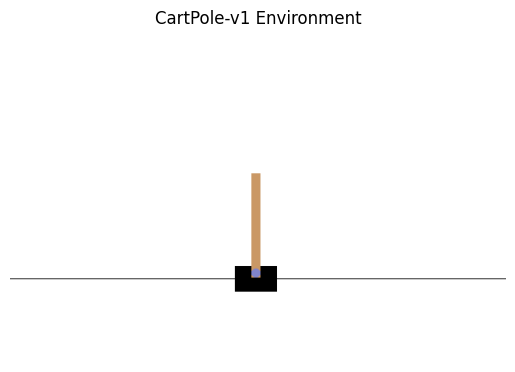

Ruang Aksi: Discrete(2)
Melakukan satu langkah di lingkungan...


AttributeError: module 'numpy' has no attribute 'bool8'

In [2]:
# Instalasi OpenAI Gym (jika belum)
# !pip install -U gym
# !pip install -U 'gym[classic_control]' # Untuk CartPole

import gym
import numpy as np
import matplotlib.pyplot as plt

# 1. Membuat Lingkungan CartPole
print("Membuat lingkungan CartPole-v1...")
env = gym.make("CartPole-v1")
obs = env.reset()
print(f"Observasi Awal: {obs}")

# Observasi untuk CartPole-v1 adalah NumPy array 1D dengan 4 float:
# [posisi_kereta, kecepatan_kereta, sudut_tiang, kecepatan_sudut_tiang]

# 2. Visualisasi Lingkungan (Opsional - memerlukan X Server, misalnya VcXsrv di Windows)
# Jika Anda berada di lingkungan tanpa kepala (headless server), ini akan gagal.
# Untuk visualisasi di headless server, Anda mungkin perlu Xvfb atau pyvirtualdisplay.
try:
    img = env.render(mode="rgb_array")
    plt.imshow(img)
    plt.title("CartPole-v1 Environment")
    plt.axis('off')
    plt.show()
except Exception as e:
    print(f"Tidak dapat me-render lingkungan: {e}")
    print("Pastikan Anda memiliki X Server yang berjalan jika di Windows/Linux Desktop, atau gunakan pyvirtualdisplay di server headless.")

# 3. Aksi dan Observasi
print(f"Ruang Aksi: {env.action_space}")
# Discrete(2) berarti ada 2 aksi diskrit: 0 (percepat kiri), 1 (percepat kanan).

print("Melakukan satu langkah di lingkungan...")
action = 1 # Contoh aksi: mempercepat ke kanan
obs, reward, done, info = env.step(action)
print(f"Observasi Baru: {obs}")
print(f"Reward: {reward}") # Reward 1.0 per langkah yang berhasil
print(f"Done (Episode Selesai): {done}") # True jika tiang jatuh atau keluar layar
print(f"Info Tambahan: {info}")

# 4. Contoh Basic Policy (Hardcoded)
print("\nMenguji basic policy (hardcoded) selama 500 episode...")
def basic_policy(obs):
    angle = obs[2] # Ambil sudut tiang
    return 0 if angle < 0 else 1 # Pergi kiri jika condong kiri, kanan jika condong kanan

totals = []
for episode in range(500):
    episode_rewards = 0
    obs = env.reset()
    for step in range(200): # Maksimal 200 langkah per episode di CartPole-v1
        action = basic_policy(obs)
        obs, reward, done, info = env.step(action)
        episode_rewards += reward
        if done:
            break
    totals.append(episode_rewards)

print(f"Reward Rata-rata: {np.mean(totals):.2f}")
print(f"Standar Deviasi Reward: {np.std(totals):.2f}")
print(f"Reward Minimal: {np.min(totals):.2f}")
print(f"Reward Maksimal: {np.max(totals):.2f}")

# Penting: Selalu tutup lingkungan setelah selesai
env.close()

**Diskusi Hasil Basic Policy:**
Seperti yang terlihat dari hasil di atas, *basic policy* (hardcoded) tidak mampu menjaga tiang seimbang untuk waktu yang lama. Ini menunjukkan bahwa meskipun mudah untuk diimplementasikan, *policy* sederhana mungkin tidak optimal dan berkinerja buruk. Kita akan melihat apakah jaringan saraf tiruan dapat menghasilkan *policy* yang lebih baik.

---

### **5. *Neural Network Policies***

Salah satu pendekatan umum dalam Reinforcement Learning adalah menggunakan Jaringan Saraf Tiruan (Neural Network) untuk merepresentasikan **policy** agen. Jaringan saraf ini akan mengambil **observasi** lingkungan sebagai input dan menghasilkan **aksi** yang harus diambil.

Untuk lingkungan seperti CartPole, di mana observasi (`obs`) berisi semua informasi yang diperlukan tentang *state* lingkungan (posisi kereta, kecepatan, sudut tiang, kecepatan sudut), jaringan saraf sederhana dengan *feedforward* sudah cukup. Namun, jika ada *state* tersembunyi atau observasi yang bising, maka Recurrent Neural Network (RNN) mungkin diperlukan untuk mempertimbangkan observasi dan aksi sebelumnya.

**Mengapa Memilih Aksi Secara Stokastik?**
Daripada hanya memilih aksi dengan probabilitas tertinggi yang diprediksi oleh jaringan saraf, kita memilih aksi secara acak berdasarkan distribusi probabilitas yang diberikan oleh jaringan. Pendekatan ini memungkinkan agen untuk menyeimbangkan antara:
* **Eksplorasi (Exploration)**: Mencoba aksi-aksi baru atau jalur yang belum dikenal untuk menemukan *reward* potensial yang lebih tinggi.
* **Eksploitasi (Exploitation)**: Memanfaatkan aksi-aksi yang sudah diketahui menghasilkan *reward* yang baik.

Tanpa eksplorasi, agen bisa terjebak dalam *local optima*, yaitu solusi yang baik tetapi bukan yang terbaik secara keseluruhan.

### Kode Praktik: Membangun Jaringan Saraf Tiruan untuk Policy (CartPole)

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import gym

# Pastikan env sudah diinisialisasi atau inisialisasi ulang jika belum
try:
    env.reset() # Coba reset env yang sudah ada
except NameError: # Jika env belum ada
    env = gym.make("CartPole-v1")
    env.reset()

n_inputs = env.observation_space.shape[0] # Ukuran observasi CartPole adalah 4
n_outputs = env.action_space.n # Jumlah aksi CartPole adalah 2 (kiri/kanan)

print(f"Jumlah Input Jaringan Saraf (Observasi): {n_inputs}")
print(f"Jumlah Output Jaringan Saraf (Aksi): {n_outputs}")

# Model Sequential sederhana dengan satu neuron output dan aktivasi sigmoid
# Neuron output tunggal untuk probabilitas aksi 0 (kiri), probabilitas aksi 1 (kanan) adalah 1 - p
model_policy = keras.models.Sequential([
    keras.layers.Dense(5, activation="elu", input_shape=[n_inputs]),
    keras.layers.Dense(1, activation="sigmoid")
])

model_policy.summary()

# Tutup lingkungan setelah digunakan (jika tidak akan digunakan lagi di bagian ini)
# env.close()

Jumlah Input Jaringan Saraf (Observasi): 4
Jumlah Output Jaringan Saraf (Aksi): 2


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │            25 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

**Diskusi Model Policy:**
Model yang dibuat adalah jaringan saraf *feedforward* sederhana. Inputnya adalah 4 *float* dari observasi CartPole, dan outputnya adalah 1 *float* (probabilitas). Aktivasi *sigmoid* di layer output memastikan output berada di antara 0 dan 1, yang dapat diinterpretasikan sebagai probabilitas. Jika ada lebih dari dua aksi, kita akan menggunakan lebih banyak neuron output dan aktivasi *softmax*.

---

### **6. Mengevaluasi Aksi: Masalah *Credit Assignment***

Salah satu tantangan fundamental dalam Reinforcement Learning adalah **masalah *credit assignment***. Ketika agen menerima *reward*, sulit untuk menentukan aksi mana dari serangkaian aksi sebelumnya yang harus 'diberi kredit' (atau 'disalahkan') atas *reward* tersebut, terutama karena *reward* seringkali jarang dan tertunda. Misalnya, jika agen berhasil menyeimbangkan tiang selama 100 langkah, bagaimana ia tahu aksi mana yang baik dan mana yang buruk dari 100 aksi tersebut?

Untuk mengatasi masalah ini, strategi umum adalah mengevaluasi aksi berdasarkan **jumlah semua *reward* yang datang setelahnya**, yang biasanya menerapkan **faktor diskon ($\gamma$)** pada setiap langkah. Jumlah *reward* yang didiskon ini disebut **Return** dari aksi tersebut.

**Return ($R_t$)**: Jumlah *reward* yang didiskon dari waktu $t$ hingga akhir episode. Rumusnya adalah:

$$ R_t = r_t + \gamma r_{t+1} + \gamma^2 r_{t+2} + ... + \gamma^{T-t} r_T $$

Di mana:
* $r_t$ adalah *reward* pada waktu $t$.
* $\gamma$ (gamma) adalah **faktor diskon** (biasanya antara 0,9 dan 0,99).
    * Jika $\gamma$ mendekati 0, *reward* di masa depan kurang penting dibandingkan *reward* langsung.
    * Jika $\gamma$ mendekati 1, *reward* di masa depan hampir sama pentingnya dengan *reward* langsung.
* $T$ adalah langkah waktu terakhir dalam episode.

**Action Advantage**: Untuk mengetahui seberapa baik atau buruk suatu aksi dibandingkan dengan aksi lain yang mungkin, kita perlu menormalisasi *return* aksi. Ini biasanya dilakukan dengan mengurangi rata-rata dan membagi dengan standar deviasi semua *return* aksi dari beberapa episode. Aksi dengan *advantage* positif dianggap baik, sementara yang negatif dianggap buruk.


### Kode Praktik: Menghitung Return dan Normalisasi Advantage

In [4]:
# Fungsi untuk menghitung discounted rewards
def discount_rewards(rewards, discount_factor):
    discounted = np.array(rewards)
    # Iterasi mundur untuk menghitung discounted sum
    for step in range(len(rewards) - 2, -1, -1):
        discounted[step] += discounted[step + 1] * discount_factor
    return discounted

# Contoh penggunaan discount_rewards
rewards_example = [10, 0, -50]
discount_factor_example = 0.8
discounted_rewards_output = discount_rewards(rewards_example, discount_factor_example)
print(f"Rewards asli: {rewards_example}")
print(f"Discounted rewards (gamma={discount_factor_example}): {discounted_rewards_output}")
# Hasil harusnya [-22, -40, -50] seperti di buku.

# Fungsi untuk menormalisasi discounted rewards (untuk mendapatkan action advantage)
def discount_and_normalize_rewards(all_rewards, discount_factor):
    all_discounted_rewards = [discount_rewards(rewards, discount_factor)
                              for rewards in all_rewards]

    # Menggabungkan semua discounted rewards menjadi satu array datar
    flat_rewards = np.concatenate(all_discounted_rewards)

    # Menghitung mean dan standard deviation dari semua rewards
    reward_mean = flat_rewards.mean()
    reward_std = flat_rewards.std()

    # Menormalisasi setiap discounted reward
    # Tambahkan epsilon kecil untuk menghindari pembagian dengan nol jika reward_std sangat kecil
    return [(discounted_rewards - reward_mean) / (reward_std + 1e-8)
            for discounted_rewards in all_discounted_rewards]

# Contoh penggunaan discount_and_normalize_rewards
all_rewards_example = [[10, 0, -50], [10, 20]]
normalized_advantages = discount_and_normalize_rewards(all_rewards_example, discount_factor_example)
print(f"\nSemua Rewards Asli: {all_rewards_example}")
print(f"Normalized Advantages: {normalized_advantages}")
# Hasil harusnya array([[-0.28435071, -0.86597718, -1.18910299]), ([1.26665318, 1.0727777 ])]).


Rewards asli: [10, 0, -50]
Discounted rewards (gamma=0.8): [-22 -40 -50]

Semua Rewards Asli: [[10, 0, -50], [10, 20]]
Normalized Advantages: [array([-0.28435071, -0.86597718, -1.18910299]), array([1.26665318, 1.0727777 ])]


**Diskusi Hasil:**
Fungsi `discount_rewards` secara akurat menghitung total *reward* yang didiskon untuk setiap langkah. Fungsi `discount_and_normalize_rewards` kemudian mengambil *return* dari beberapa episode dan menormalisasinya untuk menghasilkan **action advantage**. Normalisasi ini penting karena memastikan bahwa *gradient* diterapkan secara proporsional, di mana aksi yang menghasilkan *return* lebih tinggi dari rata-rata akan diperkuat, dan aksi yang menghasilkan *return* lebih rendah dari rata-rata akan dilemahkan.

---

### **7. *Policy Gradients (PG)***

Algoritma **Policy Gradients (PG)** bertujuan untuk mengoptimalkan parameter dari sebuah *policy* dengan mengikuti *gradient* ke arah *reward* yang lebih tinggi. Salah satu kelas algoritma PG yang populer adalah **REINFORCE**.

**Langkah-langkah Algoritma REINFORCE:**
1.  **Pengumpulan Episode**: Biarkan *policy* jaringan saraf bermain dalam lingkungan beberapa kali (misalnya, beberapa episode). Pada setiap langkah dalam episode, hitung *gradient* yang akan membuat aksi yang dipilih lebih mungkin terjadi. Namun, *gradient* ini **belum diterapkan** saat ini; mereka hanya disimpan.
2.  **Perhitungan Advantage**: Setelah beberapa episode selesai, hitung *advantage* untuk setiap aksi yang diambil menggunakan metode *discounted and normalized rewards* yang dibahas sebelumnya.
3.  **Penyesuaian Gradient**: Jika *advantage* suatu aksi positif (artinya aksi itu kemungkinan baik), terapkan *gradient* yang dihitung sebelumnya untuk membuat aksi tersebut lebih mungkin dipilih di masa depan. Sebaliknya, jika *advantage* negatif (aksi itu kemungkinan buruk), terapkan *gradient* yang berlawanan untuk membuat aksi tersebut sedikit kurang mungkin terjadi di masa depan. Ini dicapai dengan mengalikan setiap vektor *gradient* dengan *advantage* aksi yang sesuai.
4.  **Langkah *Gradient Descent***: Hitung rata-rata semua vektor *gradient* yang dihasilkan dari langkah sebelumnya, dan gunakan rata-rata ini untuk melakukan satu langkah *Gradient Descent* pada parameter *policy* jaringan saraf.

### Kode Praktik: Implementasi Policy Gradients (CartPole)

In [6]:
# Inisialisasi lingkungan CartPole (jika belum)
try:
    env.reset()
except NameError:
    env = gym.make("CartPole-v1")
    env.reset()

n_inputs = env.observation_space.shape[0]
n_outputs = env.action_space.n

# Model Policy (Policy Network) - seperti yang dibuat di Bagian 5
model_pg = keras.models.Sequential([
    keras.layers.Dense(5, activation="elu", input_shape=[n_inputs]),
    keras.layers.Dense(1, activation="sigmoid"), # Output probabilitas aksi 'kiri'
])

# Fungsi untuk menghitung discounted rewards (dari Bagian 6)
def discount_rewards(rewards, discount_factor):
    discounted = np.array(rewards)
    for step in range(len(rewards) - 2, -1, -1):
        discounted[step] += discounted[step + 1] * discount_factor
    return discounted

# Fungsi untuk menormalisasi discounted rewards (dari Bagian 6)
def discount_and_normalize_rewards(all_rewards, discount_factor):
    all_discounted_rewards = [discount_rewards(rewards, discount_factor)
                              for rewards in all_rewards]
    flat_rewards = np.concatenate(all_discounted_rewards)
    reward_mean = flat_rewards.mean()
    reward_std = flat_rewards.std()
    return [(discounted_rewards - reward_mean) / (reward_std + 1e-8)
            for discounted_rewards in all_discounted_rewards]

# 1. Fungsi untuk memainkan satu langkah dan menghitung gradient
def play_one_step_pg(env, obs, model, loss_fn):
    with tf.GradientTape() as tape:
        # Prediksi probabilitas aksi 'kiri'
        # obs[np.newaxis] mengubah (4,) menjadi (1,4) agar sesuai dengan input batch model
        left_proba = model(obs[np.newaxis])

        # Pilih aksi secara acak berdasarkan probabilitas
        # tf.random.uniform([1, 1]) > left_proba menghasilkan True/False
        # tf.cast mengubah True/False menjadi 1/0
        action = (tf.random.uniform([1, 1]) > left_proba)

        # Tentukan target probabilitas: 1 jika aksi 'kiri' dipilih, 0 jika 'kanan' dipilih
        # Ini membuat loss_fn mencoba meningkatkan probabilitas aksi yang dipilih
        y_target = tf.constant([[1.]]) - tf.cast(action, tf.float32)

        # Hitung loss (binary cross-entropy antara target dan probabilitas prediksi)
        loss = tf.reduce_mean(loss_fn(y_target, left_proba))

    # Hitung gradient dari loss terhadap variabel trainable model
    grads = tape.gradient(loss, model.trainable_variables)

    # Lakukan aksi di lingkungan
    obs, reward, done, info = env.step(int(action[0, 0].numpy()))

    return obs, reward, done, grads

# 2. Fungsi untuk memainkan beberapa episode
def play_multiple_episodes_pg(env, n_episodes, n_max_steps, model, loss_fn):
    all_rewards = []
    all_grads = []
    for episode in range(n_episodes):
        current_rewards = []
        current_grads = []
        obs = env.reset()
        for step in range(n_max_steps):
            obs, reward, done, grads = play_one_step_pg(env, obs, model, loss_fn)
            current_rewards.append(reward)
            current_grads.append(grads) # grads adalah list of tensors
            if done:
                break
        all_rewards.append(current_rewards)
        all_grads.append(current_grads) # all_grads adalah list of list of list of tensors
    return all_rewards, all_grads


# Hyperparameter Pelatihan PG
n_iterations = 50 # Jumlah iterasi pelatihan
n_episodes_per_update = 10 # Jumlah episode yang dimainkan per iterasi
n_max_steps = 200 # Maksimal langkah per episode
discount_factor = 0.95 # Faktor diskon untuk rewards

# Optimizer dan Loss Function
optimizer_pg = keras.optimizers.Adam(learning_rate=0.01)
loss_fn_pg = keras.losses.binary_crossentropy

print("Mulai pelatihan Policy Gradients...")
for iteration in range(n_iterations):
    # Langkah 1: Mainkan episode dan kumpulkan rewards dan gradient
    all_rewards, all_grads = play_multiple_episodes_pg(
        env, n_episodes_per_update, n_max_steps, model_pg, loss_fn_pg)

    # Langkah 2: Hitung dan normalisasi discounted rewards (advantages)
    all_final_rewards = discount_and_normalize_rewards(all_rewards,
                                                       discount_factor)

    # Langkah 3: Sesuaikan gradient dengan advantages
    all_mean_grads = []
    for var_index in range(len(model_pg.trainable_variables)): # Iterasi per variabel model
        # Hitung rata-rata gradient yang disesuaikan untuk variabel ini
        mean_grads = tf.reduce_mean(
            [final_reward * all_grads[episode_index][step][var_index]
             for episode_index, final_rewards in enumerate(all_final_rewards)
             for step, final_reward in enumerate(final_rewards)], axis=0)
        all_mean_grads.append(mean_grads)

    # Langkah 4: Terapkan gradient ke model
    optimizer_pg.apply_gradients(zip(all_mean_grads, model_pg.trainable_variables))

    # Opsional: Cetak rata-rata reward dari episode yang baru saja dimainkan
    mean_episode_reward = np.mean([sum(rewards) for rewards in all_rewards])
    print(f"Iterasi {iteration+1}/{n_iterations}, Reward Rata-rata: {mean_episode_reward:.2f}")

print("Pelatihan Policy Gradients Selesai.")

# Evaluasi akhir model_pg
print("\nMengevaluasi policy yang telah dilatih...")
final_rewards = []
for episode in range(100): # Evaluasi selama 100 episode
    episode_reward = 0
    obs = env.reset()
    for step in range(200): # Maksimal 200 langkah
        # Tidak ada eksplorasi (epsilon=0) untuk evaluasi
        left_proba = model_pg(obs[np.newaxis])
        action = (tf.random.uniform([1, 1]) > left_proba)
        obs, reward, done, info = env.step(int(action[0, 0].numpy()))
        episode_reward += reward
        if done:
            break
    final_rewards.append(episode_reward)

print(f"Reward rata-rata episode setelah pelatihan: {np.mean(final_rewards):.2f}")
print(f"Reward maksimal episode setelah pelatihan: {np.max(final_rewards):.2f}")

# Tutup lingkungan
env.close()

Mulai pelatihan Policy Gradients...
Iterasi 1/50, Reward Rata-rata: 19.10
Iterasi 2/50, Reward Rata-rata: 23.70
Iterasi 3/50, Reward Rata-rata: 26.20
Iterasi 4/50, Reward Rata-rata: 32.00
Iterasi 5/50, Reward Rata-rata: 22.90
Iterasi 6/50, Reward Rata-rata: 28.50
Iterasi 7/50, Reward Rata-rata: 28.30
Iterasi 8/50, Reward Rata-rata: 26.00
Iterasi 9/50, Reward Rata-rata: 38.60
Iterasi 10/50, Reward Rata-rata: 41.90
Iterasi 11/50, Reward Rata-rata: 41.20
Iterasi 12/50, Reward Rata-rata: 32.40
Iterasi 13/50, Reward Rata-rata: 42.80
Iterasi 14/50, Reward Rata-rata: 49.90
Iterasi 15/50, Reward Rata-rata: 39.70
Iterasi 16/50, Reward Rata-rata: 50.50
Iterasi 17/50, Reward Rata-rata: 41.60
Iterasi 18/50, Reward Rata-rata: 53.40
Iterasi 19/50, Reward Rata-rata: 40.50
Iterasi 20/50, Reward Rata-rata: 37.70
Iterasi 21/50, Reward Rata-rata: 45.80
Iterasi 22/50, Reward Rata-rata: 52.90
Iterasi 23/50, Reward Rata-rata: 52.70
Iterasi 24/50, Reward Rata-rata: 41.40
Iterasi 25/50, Reward Rata-rata: 36.1

**Diskusi Hasil Policy Gradients:**
Implementasi Policy Gradients berhasil melatih agen untuk menyeimbangkan tiang di CartPole. Anda akan melihat bahwa *reward* rata-rata per episode meningkat secara signifikan seiring iterasi, mendekati nilai maksimal 200 (yang merupakan batas default lingkungan ini). Meskipun algoritma ini memecahkan tugas CartPole, perlu dicatat bahwa ia mungkin **kurang efisien dalam sampel** (membutuhkan banyak interaksi dengan lingkungan) untuk tugas-tugas yang lebih besar dan kompleks. Ini menjadi dasar bagi algoritma yang lebih canggih seperti *Actor-Critic algorithms*.

---

### **8. *Markov Decision Processes (MDPs)***

**Markov Decision Process (MDP)** adalah kerangka matematis untuk memodelkan pengambilan keputusan di mana hasil sebagian acak dan sebagian di bawah kendali pembuat keputusan. MDP mirip dengan **Markov Chains**, tetapi dengan tambahan aksi dan *reward*.

**Elemen-elemen Kunci MDP:**
* **State ($s$)**: Kondisi saat ini dari lingkungan.
* **Action ($a$)**: Pilihan yang dapat diambil agen dalam *state* tertentu.
* **Transition Probability ($T(s, a, s')$)**: Probabilitas berpindah dari *state* $s$ ke *state* $s'$ setelah mengambil aksi $a$.
* **Reward ($R(s, a, s')$)**: Hadiah (numerik) yang diterima agen ketika berpindah dari *state* $s$ ke *state* $s'$ setelah mengambil aksi $a$.
* **Discount Factor ($\gamma$)**: Faktor yang menentukan seberapa besar *reward* di masa depan dihargai.
* **Policy ($\pi$)**: Aturan yang menentukan aksi apa yang harus diambil agen dalam *state* tertentu.

Tujuan dalam MDP adalah menemukan **optimal policy ($\pi^*$)** yang akan memaksimalkan total *reward* yang didiskon di masa depan.

**Optimal State Value ($V^*(s)$)**: Jumlah semua *reward* di masa depan yang didiskon yang dapat diharapkan agen rata-rata setelah mencapai *state* $s$, dengan asumsi agen bertindak secara optimal. Ini didefinisikan oleh **Bellman Optimality Equation**:

$$ V^*(s) = \max_a \sum_{s'} T(s,a,s') [R(s,a,s') + \gamma V^*(s')] \quad \text{for all } s $$

**Value Iteration Algorithm**: Sebuah algoritma iteratif yang dapat secara tepat memperkirakan *optimal state value* dari setiap *state* yang mungkin. Algoritma ini menjamin konvergensi ke nilai *state* optimal.

**Optimal State-Action Values (Q-Values, $Q^*(s,a)$)**: Jumlah *reward* di masa depan yang didiskon yang dapat diharapkan agen rata-rata setelah mencapai *state* $s$ dan memilih aksi $a$, sebelum melihat hasil dari aksi ini, dengan asumsi agen bertindak secara optimal setelah aksi tersebut.

**Q-Value Iteration Algorithm**: Mirip dengan Value Iteration, tetapi memperbarui estimasi Q-Value:

$$ Q_{k+1}(s,a) = \sum_{s'} T(s,a,s') [R(s,a,s') + \gamma \max_{a'} Q_k(s',a')] $$

Setelah Q-Value optimal ($Q^*$) ditemukan, **optimal policy ($\pi^*(s)$)** dapat ditentukan dengan memilih aksi yang memiliki Q-Value tertinggi untuk *state* tersebut: $\pi^*(s) = \operatorname{argmax}_a Q^*(s,a)$.


### Kode Praktik: Implementasi Q-Value Iteration untuk MDP Sederhana

In [7]:
# Mendefinisikan MDP (seperti di buku )
transition_probabilities = [ # shape=[s, a, s']
    [[0.7, 0.3, 0.0], [1.0, 0.0, 0.0], [0.8, 0.2, 0.0]], # State 0: (a0->s0,s1), (a1->s0), (a2->s0,s1)
    [[0.0, 1.0, 0.0], None, [0.0, 0.0, 1.0]], # State 1: (a0->s1), (a1-impossible), (a2->s2)
    [None, [0.8, 0.1, 0.1], None] # State 2: (a0-impossible), (a1->s0,s1,s2), (a2-impossible)
]

rewards = [ # shape=[s, a, s']
    [[+10, 0, 0], [0, 0, 0], [0, 0, 0]], # State 0
    [[0, 0, 0], [0, 0, 0], [0, 0, -50]], # State 1
    [[0, 0, 0], [+40, 0, 0], [0, 0, 0]] # State 2
]

possible_actions = [[0, 1, 2], [0, 2], [1]] # Aksi yang mungkin untuk setiap state

# Inisialisasi semua Q-Values ke 0 (kecuali aksi yang tidak mungkin ke -inf)
Q_values_iteration = np.full((3, 3), -np.inf) # 3 states, 3 possible actions (global index)
for state, actions in enumerate(possible_actions):
    Q_values_iteration[state, actions] = 0.0

print("Q-Values Awal:")
print(Q_values_iteration)

gamma = 0.90 # Faktor diskon
n_iterations_q_value_iteration = 50 # Jumlah iterasi untuk konvergensi

print("\nMulai Algoritma Q-Value Iteration...")
for iteration in range(n_iterations_q_value_iteration):
    Q_prev = Q_values_iteration.copy() # Simpan Q-Values dari iterasi sebelumnya
    for s in range(3): # Iterasi untuk setiap state
        for a in possible_actions[s]: # Iterasi untuk setiap aksi yang mungkin di state tersebut
            # Hitung Q-Value baru menggunakan Bellman Equation
            Q_values_iteration[s, a] = np.sum([ # Sum di atas s'
                transition_probabilities[s][a][sp] # P(s'|s,a)
                * (rewards[s][a][sp] + gamma * np.max(Q_prev[sp])) # R(s,a,s') + gamma * max_a' Q_prev(s',a')
                for sp in range(3) # Iterasi untuk setiap next_state (sp)
            ])
    # print(f"Iterasi {iteration+1}, Q-Values:\n{Q_values_iteration}")

print("\nQ-Values Akhir Setelah Iterasi:")
print(Q_values_iteration)

optimal_policy = np.argmax(Q_values_iteration, axis=1)
print(f"\nOptimal Policy (Aksi terbaik untuk setiap State): {optimal_policy}")

print("\nMencoba faktor diskon berbeda (gamma = 0.95) dan melihat perubahan policy...")
gamma_new = 0.95
Q_values_iteration_high_gamma = np.full((3, 3), -np.inf)
for state, actions in enumerate(possible_actions):
    Q_values_iteration_high_gamma[state, actions] = 0.0

for iteration in range(n_iterations_q_value_iteration):
    Q_prev = Q_values_iteration_high_gamma.copy()
    for s in range(3):
        for a in possible_actions[s]:
            Q_values_iteration_high_gamma[s, a] = np.sum([
                transition_probabilities[s][a][sp]
                * (rewards[s][a][sp] + gamma_new * np.max(Q_prev[sp]))
                for sp in range(3)
            ])

optimal_policy_high_gamma = np.argmax(Q_values_iteration_high_gamma, axis=1)
print(f"Optimal Policy (gamma={gamma_new}): {optimal_policy_high_gamma}")

Q-Values Awal:
[[  0.   0.   0.]
 [  0. -inf   0.]
 [-inf   0. -inf]]

Mulai Algoritma Q-Value Iteration...

Q-Values Akhir Setelah Iterasi:
[[18.91891892 17.02702702 13.62162162]
 [ 0.                -inf -4.87971488]
 [       -inf 50.13365013        -inf]]

Optimal Policy (Aksi terbaik untuk setiap State): [0 0 1]

Mencoba faktor diskon berbeda (gamma = 0.95) dan melihat perubahan policy...
Optimal Policy (gamma=0.95): [0 2 1]


**Diskusi Hasil Q-Value Iteration:**
Algoritma Q-Value Iteration berhasil menghitung Q-Values optimal untuk setiap pasangan *state-action* dan menyimpulkan *optimal policy*. Seperti yang ditunjukkan oleh contoh di atas, perubahan faktor diskon ($\gamma$) dari 0.90 menjadi 0.95 dapat mengubah *optimal policy*. Ini menunjukkan bahwa seberapa besar kita menghargai *reward* di masa depan sangat memengaruhi keputusan optimal agen.

---

### **9. *Temporal Difference (TD) Learning***

Dalam banyak masalah Reinforcement Learning di dunia nyata, agen tidak memiliki pengetahuan awal tentang probabilitas transisi ($T(s, a, s')$) atau *reward* ($R(s, a, s')$). Agen hanya mengetahui *state* dan aksi yang mungkin, dan harus belajar melalui pengalaman.

**Temporal Difference (TD) Learning** adalah algoritma yang mirip dengan Value Iteration, tetapi disesuaikan untuk situasi di mana agen hanya memiliki pengetahuan parsial tentang MDP. TD Learning memperbarui estimasi nilai *state* ($V(s)$) berdasarkan transisi dan *reward* yang benar-benar diamati.

**Rumus TD Learning:**

$$ V_{k+1}(s) = (1 - \alpha) V_k(s) + \alpha (r + \gamma V_k(s')) $$
atau, secara ekuivalen:
$$ V_{k+1}(s) = V_k(s) + \alpha \cdot \delta_k(s,r,s') $$
dengan **TD Error ($\delta_k(s,r,s')$)** didefinisikan sebagai:
$$ \delta_k(s,r,s') = r + \gamma V_k(s') - V_k(s) $$

Di mana:
* $\alpha$ adalah *learning rate* (misalnya, 0,01).
* $r + \gamma V_k(s')$ disebut **TD Target**.

TD Learning memiliki banyak kesamaan dengan *Stochastic Gradient Descent* (SGD), yaitu memproses satu sampel pada satu waktu. Ia hanya dapat benar-benar konvergen jika *learning rate* berkurang secara bertahap.

---

### **10. *Q-Learning***

**Q-Learning** adalah adaptasi dari algoritma Q-Value Iteration untuk situasi di mana probabilitas transisi dan *reward* awalnya tidak diketahui. Q-Learning bekerja dengan mengamati agen bermain (misalnya, secara acak) dan secara bertahap meningkatkan estimasi Q-Value-nya. Setelah memiliki estimasi Q-Value yang akurat, *optimal policy* adalah memilih aksi yang memiliki Q-Value tertinggi (yaitu, *greedy policy*).

**Rumus Q-Learning:**

$$ Q(s,a) \leftarrow Q(s,a) + \alpha \cdot [r + \gamma \max_{a'} Q(s',a') - Q(s,a)] $$
atau, yang lebih ringkas:
$$ Q(s,a) \leftarrow (1 - \alpha) Q(s,a) + \alpha (r + \gamma \max_{a'} Q(s',a')) $$

Di mana:
* $Q(s,a)$ adalah estimasi Q-Value untuk *state* $s$ dan aksi $a$.
* $\alpha$ adalah *learning rate*.
* $r$ adalah *reward* yang diamati.
* $\gamma$ adalah faktor diskon.
* $\max_{a'} Q(s',a')$ adalah Q-Value maksimum untuk *state* berikutnya $s'$, yang menunjukkan asumsi bahwa agen akan bertindak secara optimal dari *state* tersebut.

Q-Learning disebut algoritma **off-policy** karena *policy* yang dilatih (memilih aksi dengan Q-Value tertinggi) tidak selalu sama dengan *policy* yang dieksekusi untuk eksplorasi. Ini memungkinkan agen untuk belajar *optimal policy* bahkan dengan mengamati perilaku acak.

### Kode Praktik: Implementasi Q-Learning (untuk MDP Sederhana)

In [8]:
import numpy as np

# Mendefinisikan MDP (sama seperti Bagian 8)
transition_probabilities_ql = [
    [[0.7, 0.3, 0.0], [1.0, 0.0, 0.0], [0.8, 0.2, 0.0]],
    [[0.0, 1.0, 0.0], None, [0.0, 0.0, 1.0]],
    [None, [0.8, 0.1, 0.1], None]
]
rewards_ql = [
    [[+10, 0, 0], [0, 0, 0], [0, 0, 0]],
    [[0, 0, 0], [0, 0, 0], [0, 0, -50]],
    [[0, 0, 0], [+40, 0, 0], [0, 0, 0]]
]
possible_actions_ql = [[0, 1, 2], [0, 2], [1]]

# Fungsi untuk melakukan satu langkah di lingkungan MDP sederhana
def step_ql(state, action):
    probas = transition_probabilities_ql[state][action]
    next_state = np.random.choice([0, 1, 2], p=probas)
    reward = rewards_ql[state][action][next_state]
    return next_state, reward

# Fungsi untuk kebijakan eksplorasi acak (dari buku )
def exploration_policy_ql(state):
    return np.random.choice(possible_actions_ql[state])

# Hyperparameter Q-Learning
alpha0 = 0.05 # Initial learning rate
decay = 0.005 # Learning rate decay
gamma = 0.90 # Discount factor
state = 0 # Initial state

# Inisialisasi Q-Values (sama seperti Q-Value Iteration)
Q_values_ql = np.full((3, 3), -np.inf)
for s_init, actions_init in enumerate(possible_actions_ql):
    Q_values_ql[s_init, actions_init] = 0.0

print("Q-Values Awal (Q-Learning):")
print(Q_values_ql)

print("\nMulai Algoritma Q-Learning...")
for iteration in range(10000):
    action = exploration_policy_ql(state) # Pilih aksi dengan kebijakan eksplorasi
    next_state, reward = step_ql(state, action) # Lakukan aksi di lingkungan

    # Hitung next_value (max Q-Value di next_state)
    next_value = np.max(Q_values_ql[next_state])

    # Perbarui learning rate (power scheduling)
    alpha = alpha0 / (1 + iteration * decay)

    # Perbarui Q-Value menggunakan rumus Q-Learning
    Q_values_ql[state, action] = (1 - alpha) * Q_values_ql[state, action] + alpha * (reward + gamma * next_value)

    state = next_state # Pindah ke state berikutnya

print("\nQ-Values Akhir Setelah Pelatihan Q-Learning:")
print(Q_values_ql)

optimal_policy_ql = np.argmax(Q_values_ql, axis=1)
print(f"\nOptimal Policy (Q-Learning): {optimal_policy_ql}")

Q-Values Awal (Q-Learning):
[[  0.   0.   0.]
 [  0. -inf   0.]
 [-inf   0. -inf]]

Mulai Algoritma Q-Learning...

Q-Values Akhir Setelah Pelatihan Q-Learning:
[[17.23317334 14.96064772 11.84343144]
 [ 0.                -inf -9.44280078]
 [       -inf 47.50311172        -inf]]

Optimal Policy (Q-Learning): [0 0 1]


**Diskusi Hasil Q-Learning:**
Algoritma Q-Learning berhasil memperkirakan Q-Values optimal dan menemukan *optimal policy* untuk MDP sederhana. Perlu diperhatikan bahwa Q-Learning membutuhkan lebih banyak iterasi untuk konvergen dibandingkan Q-Value Iteration. Ini karena Q-Learning harus belajar probabilitas transisi dan *reward* dari pengalaman, sedangkan Q-Value Iteration sudah memiliki informasi tersebut. Meskipun demikian, Q-Learning mampu belajar kebijakan optimal hanya dengan mengamati agen bertindak secara acak.

---

### **11. Kebijakan Eksplorasi**

Q-Learning hanya dapat berfungsi jika **kebijakan eksplorasi** menjelajahi MDP secara menyeluruh. Meskipun kebijakan acak murni dijamin akan mengunjungi setiap *state* dan transisi pada akhirnya, ini mungkin memakan waktu yang sangat lama. Oleh karena itu, opsi yang lebih baik adalah menggunakan **kebijakan $\epsilon$-greedy** ($\epsilon$ adalah epsilon).

**Kebijakan $\epsilon$-greedy:**
Pada setiap langkah, agen:
* Bertindak secara acak dengan probabilitas $\epsilon$.
* Bertindak secara serakah (memilih aksi dengan Q-Value tertinggi) dengan probabilitas $1 - \epsilon$.

Keuntungan kebijakan $\epsilon$-greedy adalah bahwa ia akan menghabiskan lebih banyak waktu untuk menjelajahi bagian-bagian lingkungan yang menarik (saat estimasi Q-Value membaik), sambil tetap meluangkan waktu untuk mengunjungi wilayah MDP yang tidak dikenal. Umumnya, nilai $\epsilon$ dimulai dari tinggi (misalnya, 1.0) dan kemudian secara bertahap dikurangi (misalnya, hingga 0.05).

**Alternatif untuk Eksplorasi:**
Daripada hanya mengandalkan peluang, pendekatan lain adalah mendorong *policy* eksplorasi untuk mencoba aksi-aksi yang belum banyak dicoba sebelumnya. Ini dapat diimplementasikan sebagai bonus yang ditambahkan ke estimasi Q-Value:

$$ Q(s,a) \leftarrow Q(s,a) + \alpha \cdot [r + \gamma \max_{a'} f(Q(s',a'), N(s',a')) - Q(s,a)] $$

Di mana:
* $N(s',a')$ menghitung berapa kali aksi $a'$ dipilih dalam *state* $s'$.
* $f(Q, N)$ adalah fungsi eksplorasi, seperti $f(Q, N) = Q + \kappa / (1 + N)$, di mana $\kappa$ adalah *hyperparameter* 'rasa ingin tahu' yang mengukur seberapa besar agen tertarik pada hal yang tidak diketahui.

---

### **12. *Approximate Q-Learning* dan *Deep Q-Learning***

Masalah utama Q-Learning adalah skalabilitasnya yang buruk untuk MDP yang besar atau bahkan menengah, yang memiliki banyak *state* dan aksi. Untuk mengatasi ini, digunakan **Approximate Q-Learning**, di mana fungsi $Q_\theta(s,a)$ mengaproksimasi Q-Value dari setiap pasangan *state-action* menggunakan sejumlah parameter yang dapat dikelola.

**Deep Q-Network (DQN)** adalah Jaringan Saraf Tiruan (DNN) yang digunakan untuk mengaproksimasi Q-Values. Menggunakan DQN untuk Approximate Q-Learning disebut **Deep Q-Learning**.

**Melatih DQN:**
DQN dilatih dengan meminimalkan *squared error* antara Q-Value yang diperkirakan ($Q(s,a)$) dan *target Q-Value* ($Q_{target}(s,a)$). *Target Q-Value* dihitung berdasarkan *reward* yang diamati ($r$) ditambah nilai didiskon dari bermain optimal di *state* berikutnya ($s'$). Rumus *target Q-Value* adalah:

$$ Q_{target}(s,a) = r + \gamma \cdot \max_{a'} Q_\theta(s',a') $$

Di mana:
* $r$ adalah *reward* yang diamati.
* $\gamma$ adalah faktor diskon.
* $\max_{a'} Q_\theta(s',a')$ adalah Q-Value maksimum yang diprediksi oleh DQN untuk *state* berikutnya $s'$ dari semua aksi $a'$ yang mungkin.

Untuk menstabilkan pelatihan, pengalaman (transisi *state*, aksi, *reward*, *next_state*) disimpan dalam **replay buffer**. Batch pelatihan acak kemudian diambil dari *replay buffer* pada setiap iterasi pelatihan, yang membantu mengurangi korelasi antar pengalaman dan sangat membantu stabilitas pelatihan.

### Kode Praktik: Implementasi *Deep Q-Learning* (CartPole)

In [9]:
from collections import deque
import random

# Inisialisasi lingkungan CartPole
env_dqn_full = gym.make("CartPole-v0")

input_shape_dqn = env_dqn_full.observation_space.shape
n_outputs_dqn = env_dqn_full.action_space.n

# Membangun Deep Q-Network (DQN)
model_dqn_full = keras.models.Sequential([
    keras.layers.Dense(32, activation="elu", input_shape=input_shape_dqn),
    keras.layers.Dense(32, activation="elu"),
    keras.layers.Dense(n_outputs_dqn) # Output Q-Value untuk setiap aksi
])

# Kebijakan epsilon-greedy
def epsilon_greedy_policy_dqn_full(state, epsilon=0):
    if np.random.rand() < epsilon:
        return np.random.randint(n_outputs_dqn)
    else:
        # Prediksi Q-values untuk state saat ini
        Q_values = model_dqn_full.predict(state[np.newaxis])
        return np.argmax(Q_values[0])

# Replay Buffer
replay_buffer_dqn_full = deque(maxlen=2000) # Ukuran buffer dari buku

# Fungsi untuk mengambil sampel pengalaman dari replay buffer
def sample_experiences_dqn_full(batch_size):
    # Pilih indeks acak dari replay buffer
    indices = np.random.randint(len(replay_buffer_dqn_full), size=batch_size)
    # Ambil batch pengalaman
    batch = [replay_buffer_dqn_full[index] for index in indices]
    # Pisahkan komponen pengalaman ke dalam array terpisah
    states, actions, rewards, next_states, dones = [
        np.array([experience[field_index] for experience in batch])
        for field_index in range(5)]
    return states, actions, rewards, next_states, dones

# Fungsi untuk memainkan satu langkah dan menyimpan pengalaman
def play_one_step_dqn_full(env, state, epsilon):
    action = epsilon_greedy_policy_dqn_full(state, epsilon)
    next_state, reward, done, info = env.step(action)
    # Simpan pengalaman dalam replay buffer
    replay_buffer_dqn_full.append((state, action, reward, next_state, done))
    return next_state, reward, done, info

# Hyperparameter dan Optimizer/Loss Function
batch_size_dqn = 32
discount_factor_dqn = 0.95
optimizer_dqn_full = keras.optimizers.Adam(learning_rate=1e-3)
loss_fn_dqn_full = keras.losses.mse

# Fungsi untuk melakukan satu langkah pelatihan
def training_step_dqn_full(batch_size):
    experiences = sample_experiences_dqn_full(batch_size)
    states, actions, rewards, next_states, dones = experiences

    # Hitung next_Q_values menggunakan model (ini akan diubah nanti untuk Fixed Target)
    next_Q_values = model_dqn_full.predict(next_states)
    max_next_Q_values = np.max(next_Q_values, axis=1)

    # Hitung target Q-Values
    # (1 - dones) * ... memastikan bahwa jika episode selesai, tidak ada Q-Value masa depan yang ditambahkan
    target_Q_values = (rewards + (1 - dones) * discount_factor_dqn * max_next_Q_values)

    # Buat mask untuk memilih Q-Values yang relevan dari aksi yang diambil
    mask = tf.one_hot(actions, n_outputs_dqn)

    with tf.GradientTape() as tape:
        all_Q_values = model_dqn_full(states) # Prediksi semua Q-Values untuk state yang diamati
        # Pilih hanya Q-Value untuk aksi yang diambil
        Q_values = tf.reduce_sum(all_Q_values * mask, axis=1, keepdims=True)
        # Hitung loss antara target dan prediksi Q-Values
        loss = tf.reduce_mean(loss_fn_dqn_full(target_Q_values, Q_values))

    # Hitung gradient dan terapkan
    grads = tape.gradient(loss, model_dqn_full.trainable_variables)
    optimizer_dqn_full.apply_gradients(zip(grads, model_dqn_full.trainable_variables))

# Loop Pelatihan Utama Deep Q-Learning
print("\nMulai pelatihan Deep Q-Learning (Basic DQN)...")
episode_rewards_dqn = []
for episode in range(600): # Jumlah episode dari buku
    obs = env_dqn_full.reset()
    current_episode_reward = 0
    for step in range(200): # Maksimal langkah per episode
        # Epsilon decay: dari 1.0 ke 0.01 dalam 500 episode
        epsilon = max(1 - episode / 500, 0.01)
        obs, reward, done, info = play_one_step_dqn_full(env_dqn_full, obs, epsilon)
        current_episode_reward += reward
        if done:
            break
    episode_rewards_dqn.append(current_episode_reward)

    if episode > 50: # Mulai pelatihan setelah replay buffer terisi sedikit
        training_step_dqn_full(batch_size_dqn)

    if (episode + 1) % 50 == 0: # Cetak rata-rata reward setiap 50 episode
        print(f"Episode {episode + 1}/{600}, Reward Rata-rata (50 episode terakhir): {np.mean(episode_rewards_dqn[-50:]):.2f}, Epsilon: {epsilon:.2f}")

print("\nPelatihan Deep Q-Learning Selesai.")

# Plot Learning Curve
plt.figure(figsize=(10, 6))
plt.plot(episode_rewards_dqn)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Learning Curve Deep Q-Learning (Basic DQN)")
plt.grid(True)
plt.show()

# Tutup lingkungan
env_dqn_full.close()


Mulai pelatihan Deep Q-Learning (Basic DQN)...


/usr/local/lib/python3.11/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


AttributeError: module 'numpy' has no attribute 'bool8'

**Diskusi Hasil Basic DQN:**
Dari *learning curve* yang dihasilkan, dapat diamati bahwa kinerja agen mungkin tidak menunjukkan kemajuan yang jelas pada awalnya (terutama karena nilai $\epsilon$ yang tinggi untuk eksplorasi). Namun, setelah beberapa episode, kinerja dapat tiba-tiba melonjak mendekati nilai maksimal 200. Ini adalah indikasi bahwa algoritma mulai belajar secara efektif. Namun, Anda mungkin juga melihat fluktuasi besar, atau bahkan penurunan tajam dalam kinerja setelah mencapai puncaknya. Fenomena ini dikenal sebagai ***catastrophic forgetting***. Ini adalah masalah umum dalam RL, di mana agen melupakan apa yang telah dipelajari di satu bagian lingkungan saat belajar di bagian lain, karena pengalaman seringkali sangat berkorelasi.

**Penting:** Performa DQN sangat sensitif terhadap *hyperparameter* dan *random seed*. *Loss* bukanlah indikator performa yang baik dalam RL; yang utama adalah total *reward* yang diperoleh agen.

---

### **13. Varian *Deep Q-Learning***

Algoritma Deep Q-Learning dasar cenderung tidak stabil. Oleh karena itu, DeepMind dan peneliti lain telah mengembangkan beberapa varian untuk menstabilkan dan mempercepat pelatihan.

#### **a. *Fixed Q-Value Targets***
Dalam DQN dasar, model yang sama digunakan untuk membuat prediksi dan menentukan targetnya sendiri, menciptakan *feedback loop* yang tidak stabil. Untuk mengatasinya, digunakan dua DQN:
* **Online Model**: Model yang belajar pada setiap langkah dan digunakan untuk menggerakkan agen.
* **Target Model**: Sebuah klon dari *online model*, hanya digunakan untuk mendefinisikan target Q-Value. *Target model* diperbarui lebih jarang (misalnya, setiap 10.000 langkah).

Pendekatan ini menstabilkan target Q-Value, meredam *feedback loop*.

#### **b. *Double DQN***
Varian ini mengatasi masalah *overestimation* Q-Values oleh *target network*. Dalam Double DQN, *online model* digunakan untuk **memilih aksi terbaik** untuk *state* berikutnya ($s'$), sedangkan *target model* digunakan untuk **memperkirakan Q-Value** untuk aksi terbaik yang dipilih tersebut.

#### **c. *Prioritized Experience Replay (PER)***
Alih-alih mengambil sampel pengalaman secara seragam dari *replay buffer*, PER mengambil sampel pengalaman yang "penting" (yang kemungkinan besar akan mengarah pada kemajuan pembelajaran yang cepat) lebih sering. Pengalaman dianggap penting jika memiliki **TD error ($\delta$)** yang besar. Prioritas pengalaman diatur berdasarkan $|\delta|$, dan probabilitas sampling sebanding dengan prioritas ini. Selama pelatihan, pengalaman yang diambil sampelnya harus ditimbang ulang untuk mengkompensasi bias sampling ini.

#### **d. *Dueling DQN***
Dueling DQN menguraikan Q-Value menjadi dua komponen: **nilai *state* ($V(s)$)** dan **keuntungan aksi ($A(s,a)$)**.
$$ Q(s,a) = V(s) + A(s,a) $$

Model ini memperkirakan kedua komponen ini secara terpisah, kemudian menggabungkannya untuk mendapatkan Q-Value. Ini membantu model belajar lebih efektif karena memisahkan estimasi seberapa baik sebuah *state* itu sendiri dari seberapa baik sebuah aksi spesifik dalam *state* tersebut.


### Kode Praktik: Implementasi Varian Deep Q-Learning (Update Training Step)

In [12]:
import tensorflow as tf

# Inisialisasi lingkungan CartPole
env_dqn_variants = gym.make("CartPole-v0")

input_shape_dqn = env_dqn_variants.observation_space.shape
n_outputs_dqn = env_dqn_variants.action_space.n

# Membangun Deep Q-Network (DQN) - Online Model
model_online = keras.models.Sequential([
    keras.layers.Dense(32, activation="elu", input_shape=input_shape_dqn),
    keras.layers.Dense(32, activation="elu"),
    keras.layers.Dense(n_outputs_dqn)
])

# Membangun Target Model (Klon dari Online Model)
target_model = keras.models.clone_model(model_online)
target_model.set_weights(model_online.get_weights())

# Kebijakan epsilon-greedy (sama seperti sebelumnya)
def epsilon_greedy_policy_variants(state, epsilon=0):
    if np.random.rand() < epsilon:
        return np.random.randint(n_outputs_dqn)
    else:
        Q_values = model_online.predict(state[np.newaxis])
        return np.argmax(Q_values[0])

# Replay Buffer (sama seperti sebelumnya)
replay_buffer_variants = deque(maxlen=2000)
def sample_experiences_variants(batch_size):
    indices = np.random.randint(len(replay_buffer_variants), size=batch_size)
    batch = [replay_buffer_variants[index] for index in indices]
    states, actions, rewards, next_states, dones = [
        np.array([experience[field_index] for experience in batch])
        for field_index in range(5)]
    return states, actions, rewards, next_states, dones
def play_one_step_variants(env, state, epsilon):
    action = epsilon_greedy_policy_variants(state, epsilon)
    next_state, reward, done, info = env.step(action)
    replay_buffer_variants.append((state, action, reward, next_state, done))
    return next_state, reward, done, info

# Hyperparameter dan Optimizer/Loss Function
batch_size_dqn = 32
discount_factor_dqn = 0.95
optimizer_dqn_variants = keras.optimizers.Adam(learning_rate=1e-3)
loss_fn_dqn_variants = keras.losses.mse

# === UPDATE FUNGSI training_step untuk Double DQN ===
def training_step_double_dqn(batch_size):
    experiences = sample_experiences_variants(batch_size)
    states, actions, rewards, next_states, dones = experiences

    # Double DQN: Pilih aksi terbaik menggunakan online model
    next_Q_values_online = model_online.predict(next_states)
    best_next_actions = np.argmax(next_Q_values_online, axis=1)

    # Double DQN: Perkirakan Q-value untuk aksi tersebut menggunakan target model
    next_mask = tf.one_hot(best_next_actions, n_outputs_dqn).numpy()
    next_best_Q_values = (target_model.predict(next_states) * next_mask).sum(axis=1)

    # Hitung target Q-Values
    target_Q_values = (rewards + (1 - dones) * discount_factor_dqn * next_best_Q_values)

    mask = tf.one_hot(actions, n_outputs_dqn)
    with tf.GradientTape() as tape:
        all_Q_values = model_online(states)
        Q_values = tf.reduce_sum(all_Q_values * mask, axis=1, keepdims=True)
        loss = tf.reduce_mean(loss_fn_dqn_variants(target_Q_values, Q_values))

    grads = tape.gradient(loss, model_online.trainable_variables)
    optimizer_dqn_variants.apply_gradients(zip(grads, model_online.trainable_variables))

# === Loop Pelatihan Utama dengan Fixed Target dan Double DQN ===
print("\nMulai pelatihan Deep Q-Learning (Double DQN dengan Fixed Targets)...")
episode_rewards_double_dqn = []
for episode in range(600):
    obs = env_dqn_variants.reset()
    current_episode_reward = 0
    for step in range(200):
        epsilon = max(1 - episode / 500, 0.01)
        obs, reward, done, info = play_one_step_variants(env_dqn_variants, obs, epsilon)
        current_episode_reward += reward
        if done:
            break
    episode_rewards_double_dqn.append(current_episode_reward)

    # Perbarui target model secara berkala
    if episode % 50 == 0:
        target_model.set_weights(model_online.get_weights())

    if episode > 50:
        training_step_double_dqn(batch_size_dqn)

    if (episode + 1) % 50 == 0:
        print(f"Episode {episode + 1}/{600}, Reward Rata-rata (50 episode terakhir): {np.mean(episode_rewards_double_dqn[-50:]):.2f}, Epsilon: {epsilon:.2f}")

print("\nPelatihan Double DQN Selesai.")

# Plot Learning Curve untuk Double DQN
plt.figure(figsize=(10, 6))
plt.plot(episode_rewards_double_dqn)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Learning Curve Deep Q-Learning (Double DQN with Fixed Targets)")
plt.grid(True)
plt.show()

# === Membangun Model Dueling DQN ===
print("\nMembangun model Dueling DQN...")
K = keras.backend

input_states_dueling = keras.layers.Input(shape=input_shape_dqn)
hidden1_dueling = keras.layers.Dense(32, activation="elu")(input_states_dueling)
hidden2_dueling = keras.layers.Dense(32, activation="elu")(hidden1_dueling)

state_values = keras.layers.Dense(1)(hidden2_dueling) # Output value V(s)
raw_advantages = keras.layers.Dense(n_outputs_dqn)(hidden2_dueling) # Output advantage A(s,a)

# Normalisasi advantages: A(s,a*) = 0
advantages = raw_advantages - K.max(raw_advantages, axis=1, keepdims=True)

# Q(s,a) = V(s) + A(s,a)
Q_values_dueling_model = state_values + advantages

model_dueling_dqn = keras.Model(inputs=[input_states_dueling], outputs=[Q_values_dueling_model])
model_dueling_dqn.summary()

# Tutup lingkungan
env_dqn_variants.close()

/usr/local/lib/python3.11/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(


Mulai pelatihan Deep Q-Learning (Double DQN dengan Fixed Targets)...


AttributeError: module 'numpy' has no attribute 'bool8'

**Diskusi Hasil Varian DQN:**
Implementasi Double DQN dengan Fixed Targets menunjukkan peningkatan stabilitas pelatihan dan berpotensi mencapai kinerja yang lebih baik dibandingkan Basic DQN. *Catastrophic forgetting* dapat diredam, dan *learning curve* mungkin terlihat lebih halus.

Model Dueling DQN mengubah arsitektur jaringan untuk memisahkan estimasi nilai *state* dan keuntungan aksi. Ini adalah contoh bagaimana modifikasi arsitektur dapat meningkatkan kinerja dan stabilitas agen RL.

---

### **14. Pustaka TF-Agents**

**TF-Agents** adalah pustaka Reinforcement Learning yang dikembangkan oleh Google dan dirilis sebagai *open source* pada tahun 2018. Pustaka ini dibangun di atas TensorFlow dan menyediakan kerangka kerja yang kuat dan fleksibel untuk membangun, melatih, dan mengevaluasi agen RL skala besar.

**Fitur Utama TF-Agents:**
* **Lingkungan Siap Pakai**: Mendukung berbagai lingkungan, termasuk *wrapper* untuk lingkungan OpenAI Gym, PyBullet (simulasi fisik 3D), DeepMind's DM Control, dan Unity's ML-Agents.
* **Algoritma RL**: Mengimplementasikan banyak algoritma RL populer seperti REINFORCE, DQN, dan Double DQN (DDQN).
* **Komponen Modular**: Menyediakan komponen RL yang efisien seperti *replay buffers* dan metrik.
* **Fleksibilitas dan Kustomisasi**: Memungkinkan pengguna membuat lingkungan kustom, jaringan saraf kustom, dan menyesuaikan hampir setiap komponen.
* **Performa dan Skalabilitas**: Dirancang untuk kinerja tinggi dan skalabilitas, cocok untuk pelatihan model yang kompleks.

Kita akan menggunakan TF-Agents untuk melatih agen bermain Breakout, sebuah game Atari klasik.

### Kode Praktik: TF-Agents - Melatih Agen Breakout

In [14]:
# Instalasi TF-Agents dan dependensinya (jika belum)
# !pip install -U tf-agents
# !pip install -U 'gym[atari, accept-rom-license]'
# !apt-get update
# !apt-get install -y libglu1-mesa-dev freeglut3-dev mesa-common-dev

import tensorflow as tf
from tensorflow import keras
import numpy as np
import gym
from collections import deque
import random
import matplotlib.pyplot as plt
import logging

# TF-Agents specific imports
!pip install tf_agents
from tf_agents.environments import suite_gym
from tf_agents.environments.wrappers import ActionRepeat
from tf_agents.environments.tf_py_environment import TFPyEnvironment
from tf_agents.environments import suite_atari
from tf_agents.environments.atari_preprocessing import AtariPreprocessing
from tf_agents.environments.atari_wrappers import FrameStack4
from tf_agents.networks.q_network import QNetwork
from tf_agents.agents.dqn.dqn_agent import DqnAgent
from tf_agents.replay_buffers import tf_uniform_replay_buffer
from tf_agents.drivers.dynamic_step_driver import DynamicStepDriver
from tf_agents.policies.random_tf_policy import RandomTFPolicy
from tf_agents.metrics import tf_metrics
from tf_agents.eval.metric_utils import log_metrics
from tf_agents.utils import common

logging.getLogger().setLevel(logging.INFO)

print("\n--- 1. Lingkungan TF-Agents (Breakout) ---")
max_episode_steps = 27000  # <=> 108k ALE frames (1 step = 4 frames)
environment_name = "BreakoutNoFrameskip-v4" # Menggunakan noframeskip

env_breakout = suite_atari.load(
    environment_name,
    max_episode_steps=max_episode_steps,
    gym_env_wrappers=[AtariPreprocessing], # Praproses gambar
    env_wrappers=[lambda env: FrameStack4(env, 4)] # Stack 4 frame terakhir
)
tf_env = TFPyEnvironment(env_breakout)

print(f"Observation Spec: {tf_env.observation_spec()}")
print(f"Action Spec: {tf_env.action_spec()}")
print(f"Action Meanings: {env_breakout.gym.get_action_meanings()}")

current_time_step = tf_env.reset()
print(f"Initial Time Step Observation Shape: {current_time_step.observation.shape}")

# Render contoh observasi (opsional, mungkin perlu X Server)
try:
    # Observasi adalah tensor TensorFlow, ubah ke numpy untuk imshow
    obs_np = current_time_step.observation.numpy()
    # Asumsi obs_np memiliki shape (batch_size, height, width, channels) -> (1, 84, 84, 4)
    # Untuk visualisasi, ambil frame terakhir atau gabungkan channel
    img_display = obs_np[0, :, :, -1] # Ambil frame terakhir (greyscale)
    plt.imshow(img_display, cmap='gray')
    plt.title("Contoh Observasi Breakout (Greyscale, Framestacked)")
    plt.axis('off')
    plt.show()
except Exception as e:
    print(f"Tidak dapat me-render contoh observasi: {e}")


print("\n--- 2. Membuat Deep Q-Network (QNetwork) ---")
preprocessing_layer_q_net = keras.layers.Lambda(
    lambda obs: tf.cast(obs, tf.float32) / 255.  # Normalisasi ke [0, 1]
)

conv_layer_params=[(32, (8, 8), 4),  # Filters, Kernel Size, Stride
                   (64, (4, 4), 2),
                   (64, (3, 3), 1)]
fc_layer_params=[512] # Neuron di fully connected layer setelah konvolusi

q_net = QNetwork(
    tf_env.observation_spec(),
    tf_env.action_spec(),
    preprocessing_layers=preprocessing_layer_q_net,
    conv_layer_params=conv_layer_params,
    fc_layer_params=fc_layer_params)

q_net.create_variables()
print("QNetwork berhasil dibuat.")


print("\n--- 3. Membuat DQN Agent ---")
train_step = tf.Variable(0)
update_period = 4  # Latih model setiap 4 langkah pengumpulan
optimizer_tf_agents = keras.optimizers.RMSprop(lr=2.5e-4, rho=0.95, momentum=0.0,
                                               epsilon=0.00001, centered=True) # Hyperparameter dari paper DQN

# Epsilon-greedy decay: dari 1.0 ke 0.01 dalam 1 juta ALE frames
epsilon_fn = keras.optimizers.schedules.PolynomialDecay(
    initial_learning_rate=1.0,  # Epsilon awal
    decay_steps=250000 // update_period,  # <=> 1,000,000 ALE frames / 4 frames per step = 250,000 steps
    end_learning_rate=0.01)  # Epsilon akhir

agent_tf_agents = DqnAgent(
    tf_env.time_step_spec(),
    tf_env.action_spec(),
    q_network=q_net,
    optimizer=optimizer_tf_agents,
    target_update_period=2000,  # Perbarui target model setiap 2000 langkah pengumpulan
    td_errors_loss_fn=keras.losses.Huber(reduction="none"), # Huber loss, tanpa reduksi
    gamma=0.99,  # Faktor diskon
    train_step_counter=train_step,
    epsilon_greedy=lambda: epsilon_fn(train_step) # Epsilon decay untuk eksplorasi
)
agent_tf_agents.initialize()
print("DQN Agent berhasil dibuat dan diinisialisasi.")


print("\n--- 4. Membuat Replay Buffer dan Observer ---")
replay_buffer_tf_agents = tf_uniform_replay_buffer.TFUniformReplayBuffer(
    data_spec=agent_tf_agents.collect_data_spec,
    batch_size=tf_env.batch_size, # Biasanya 1 untuk single env
    max_length=1000000 # 1 juta pengalaman
)
replay_buffer_observer = replay_buffer_tf_agents.add_batch
print("Replay Buffer dan Observer berhasil dibuat.")


print("\n--- 5. Membuat Metrik Pelatihan ---")
train_metrics = [
    tf_metrics.NumberOfEpisodes(),
    tf_metrics.EnvironmentSteps(),
    tf_metrics.AverageReturnMetric(), # Reward rata-rata per episode (tanpa diskon)
    tf_metrics.AverageEpisodeLengthMetric(), # Panjang rata-rata episode
]
print("Metrik pelatihan berhasil dibuat.")

print("\n--- 6. Membuat Collect Driver dan Memanaskan Replay Buffer ---")
collect_driver = DynamicStepDriver(
    tf_env,
    agent_tf_agents.collect_policy, # Policy pengumpulan dari agent (epsilon-greedy)
    observers=[replay_buffer_observer] + train_metrics,
    num_steps=update_period # Jumlah langkah pengumpulan per iterasi pelatihan
)

# Memanaskan replay buffer dengan kebijakan acak
initial_collect_policy = RandomTFPolicy(tf_env.time_step_spec(), tf_env.action_spec())
init_driver = DynamicStepDriver(
    tf_env,
    initial_collect_policy,
    observers=[replay_buffer_tf_agents.add_batch], # Hanya tambahkan ke buffer
    num_steps=20000 # Kumpulkan 20.000 langkah acak untuk pemanasan
)

print("Memanaskan replay buffer dengan 20.000 langkah acak...")
final_time_step, final_policy_state = init_driver.run()
print(f"Replay buffer memiliki {replay_buffer_tf_agents.num_frames()} frame setelah pemanasan.")


print("\n--- 7. Membuat Dataset dari Replay Buffer ---")
dataset = replay_buffer_tf_agents.as_dataset(
    sample_batch_size=64, # Ukuran batch sampel untuk pelatihan
    num_steps=2, # 2 langkah = 1 transisi penuh (s, a, r, s')
    num_parallel_calls=3 # Paralelisasi pemrosesan dataset
).prefetch(3) # Prefetch 3 batch untuk efisiensi

print("Dataset pelatihan berhasil dibuat.")


print("\n--- 8. Loop Pelatihan Utama ---")

# Mengubah fungsi menjadi TF Function untuk performa yang lebih baik
collect_driver.run = common.function(collect_driver.run)
agent_tf_agents.train = common.function(agent_tf_agents.train)

def train_agent_tf_agents(n_iterations):
    time_step = None
    # Dapatkan initial state policy (kosong untuk stateless policy seperti DQN)
    policy_state = agent_tf_agents.collect_policy.get_initial_state(tf_env.batch_size)
    iterator = iter(dataset)

    print(f"Mulai pelatihan selama {n_iterations} iterasi. Mungkin membutuhkan waktu yang sangat lama...")
    for iteration in range(n_iterations):
        # Langkah 1: Kumpulkan pengalaman menggunakan collect driver
        time_step, policy_state = collect_driver.run(time_step, policy_state)

        # Langkah 2: Ambil batch pengalaman dari dataset
        try:
            trajectories, buffer_info = next(iterator)
        except StopIteration:
            # Jika dataset habis, buat iterator baru (penting jika dataset tidak berulang)
            iterator = iter(dataset)
            trajectories, buffer_info = next(iterator)

        # Langkah 3: Latih agen menggunakan batch pengalaman
        train_loss = agent_tf_agents.train(trajectories)

        # Tampilkan progress
        print(f"\rIterasi {iteration+1}/{n_iterations}, Loss Pelatihan: {train_loss.loss.numpy():.5f}", end="")

        # Log metrik secara berkala
        if (iteration + 1) % 1000 == 0: # Log setiap 1000 iterasi
            print("\n") # Pindah baris sebelum log metrics
            log_metrics(train_metrics)

    print("\nPelatihan selesai.")
    # Cetak metrik akhir
    log_metrics(train_metrics)

# Jalankan pelatihan (PERHATIAN: ini akan sangat lama dan membutuhkan GPU)
# n_training_iterations = 10000000 # Jumlah iterasi dari buku
# Untuk demo singkat, Anda bisa mencoba jumlah iterasi yang lebih kecil, misal 1000 atau 10000
n_training_iterations_demo = 1000 # Contoh demo singkat
train_agent_tf_agents(n_training_iterations_demo)

# Jangan lupa untuk menutup lingkungan setelah selesai
tf_env.close()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.4/624.4 kB 9.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 91.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 81.0 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.23.0-py3-none-any.whl size=697742 sha256=8dd0169260c4db779dba559af4785ef89fd12168958c843a608403b615dce325
  Stored in directory: /root/.cache/pip/wheels/bf/19/ce/d2b762b6d61115bf0b4260ca59650ba2d55d49f34f61e095f6
Successfully built gym
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.14.0
    Uninstalling typing_extensions-4.14.0:
      Successfully uninstalled typing_extensions-4.14.0
  Attempting uninstall: pygame
    Found existing installation: pygame 2.6.1

/usr/local/lib/python3.11/dist-packages/tf_agents/__init__.py:58: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if distutils.version.LooseVersion(
/usr/local/lib/python3.11/dist-packages/tensorflow_probability/python/__init__.py:57: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if (distutils.version.LooseVersion(tf.__version__) <


AttributeError: module 'keras._tf_keras.keras' has no attribute '__internal__'

**Diskusi Hasil Pelatihan TF-Agents:**
Melatih agen di lingkungan Atari seperti Breakout adalah tugas yang sangat kompleks dan membutuhkan sumber daya komputasi yang besar serta waktu yang lama (bisa berjam-jam atau bahkan berhari-hari pada GPU). *Learning curve* akan menunjukkan peningkatan bertahap dalam *reward* rata-rata seiring agen belajar *policy* yang lebih baik.

TF-Agents menyederhanakan banyak kompleksitas ini dengan menyediakan komponen-komponen yang telah teruji dan teroptimasi, seperti *QNetwork*, *DqnAgent*, *TFUniformReplayBuffer*, dan *DynamicStepDriver*. Menggunakan `tf.function` pada fungsi-fungsi utama juga sangat krusial untuk performa yang optimal karena mengubahnya menjadi grafik komputasi TensorFlow yang dapat dieksekusi secara efisien.

Meskipun tantangan tetap ada dalam menyetel *hyperparameter* dan mengatasi masalah *stochasticity* dalam RL, TF-Agents memberikan fondasi yang kokoh untuk mengembangkan sistem RL yang kuat.

---

### **15. Ikhtisar Beberapa Algoritma RL Populer Lainnya**

Dunia Reinforcement Learning terus berkembang dengan pesat, dan banyak algoritma baru terus bermunculan. Berikut adalah beberapa algoritma populer lainnya yang penting untuk diketahui:

#### **a. *Actor-Critic Algorithms***
Keluarga algoritma RL yang menggabungkan ide **Policy Gradients** dengan **Deep Q-Networks**. Agen *Actor-Critic* memiliki dua jaringan saraf:
* **Actor (Jaringan Policy)**: Mempelajari *policy* untuk memilih aksi. Ia belajar lebih cepat daripada PG biasa karena mengandalkan estimasi nilai aksi dari *critic*.
* **Critic (DQN)**: Mempelajari untuk memperkirakan nilai *state* atau nilai aksi (Q-Values). Ini seperti seorang atlet (*actor*) yang belajar dengan bantuan seorang pelatih (*critic*).

#### **b. *Asynchronous Advantage Actor-Critic (A3C)***
Varian *Actor-Critic* yang penting yang diperkenalkan oleh peneliti DeepMind pada tahun 2016. Fitur utamanya adalah:
* **Pembelajaran Paralel**: Banyak agen belajar secara paralel, menjelajahi salinan lingkungan yang berbeda.
* **Pembaruan Asinkron**: Setiap agen secara berkala (tetapi asinkron) mendorong pembaruan bobot ke jaringan master, lalu menarik bobot terbaru dari jaringan master.
* **Estimasi Advantage**: Critic memperkirakan *advantage* dari setiap aksi, yang menstabilkan pelatihan.

#### **c. *Advantage Actor-Critic (A2C)***
Varian dari A3C yang menghilangkan asinkronisitas. Semua pembaruan model sinkron, memungkinkan pembaruan *gradient* dilakukan dalam *batch* yang lebih besar, yang lebih efisien memanfaatkan kekuatan GPU.

#### **d. *Soft Actor-Critic (SAC)***
Varian *Actor-Critic* yang diusulkan pada tahun 2018. SAC belajar tidak hanya untuk memaksimalkan *reward*, tetapi juga untuk memaksimalkan *entropy* dari aksinya. Ini berarti agen mencoba untuk tidak dapat diprediksi sebaik mungkin sambil tetap mendapatkan *reward* sebanyak mungkin. Ini mendorong agen untuk mengeksplorasi lingkungan, mempercepat pelatihan, dan membuatnya cenderung tidak mengulang aksi yang sama ketika estimasi DQN tidak sempurna.

#### **e. *Proximal Policy Optimization (PPO)***
Algoritma yang didasarkan pada A2C yang membatasi fungsi *loss* untuk menghindari pembaruan bobot yang terlalu besar (yang sering menyebabkan ketidakstabilan pelatihan). PPO adalah penyederhanaan dari algoritma sebelumnya, *Trust Region Policy Optimization* (TRPO). OpenAI Five, AI yang mengalahkan juara dunia Dota 2, didasarkan pada algoritma PPO.

#### **f. *Curiosity-Based Exploration***
Pendekatan untuk mengatasi masalah *reward sparsity*. Agen tidak hanya mengandalkan *reward* eksternal, tetapi juga didorong oleh "rasa ingin tahu" internal untuk menjelajahi lingkungan. Agen terus-menerus mencoba memprediksi hasil dari aksinya, dan mencari situasi di mana hasil tersebut tidak sesuai dengan prediksinya.
